In [246]:
# Import Necessary Libraries

import pandas  as pd
import os

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from itertools import combinations
from collections import Counter

In [125]:
# Merging 12 months of sales data into a single file

df = pd.read_csv("Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/")]

all_months_data = pd.DataFrame()

# Temporary solution - first file read was a ipynb checkpoint temp file, so I had to skip the first file from reading into df
i = 0

for file in files:
    if i != 0:
        df = pd.read_csv("Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
        all_months_data = pd.concat([all_months_data, df])
    i = 1

all_months_data.to_csv("all_data.csv", index=False)

In [126]:
# Read in updated dataframe

df = pd.read_csv("Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/all_data.csv")

In [127]:
# Clean up data

nan_df = df[df.isna().any(axis=1)]

df = df.dropna(how='all')

In [128]:
# When trying to add 'Month' column, and convert it into INT value, it returns an error because one of the columns is displaying 'Or' value instead of month number
# Find it and delete it

df = df[df['Order Date'].str[:2] != 'Or']

In [279]:
# Convert columns to correct type

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [130]:
# Augment data with additional columns

df['Month'] = df['Order Date'].str[:2]
df['Month'] = df['Month'].astype('int32')

In [211]:
# Add Order Total column

df['Order Total'] = df['Quantity Ordered'] * df['Price Each']

In [104]:
# Question 1: What was the best month for sales? How much was earned that month?

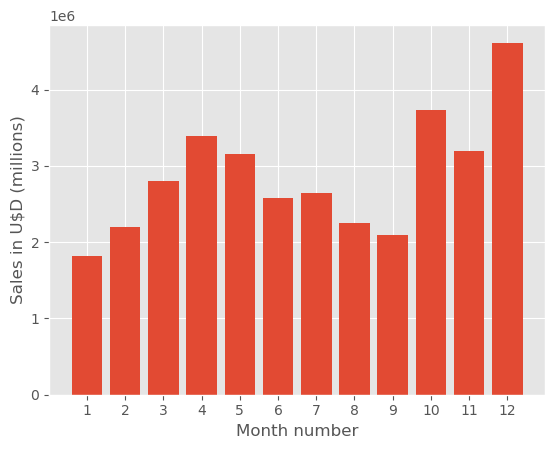

In [365]:
# We want to get a df grouped by month, which shows us the sum of all order totals corresponding to that month
monthly_results = df.groupby('Month').sum('Order Total')['Order Total']

# We create a list of numbers 1-12 for x-axis to show Month in number
# And we call for a matplotlib's bar chart 

months = range(1,13)

plt.bar(months, monthly_results)
plt.xticks(months)
plt.ylabel('Sales in U$D (millions)')
plt.xlabel('Month number')

plt.show()

In [98]:
# Question 2: What US city had the highest number of sales?

In [360]:
# We add to our dataframe a City column, by splitting the Purchase Address in a list of 3 strings ( Address, City, ST Zip code )
# By using .str[1], we are choosing the City part of the full address

df['City'] = df['Purchase Address'].str.split(', ').str[1]

# Since there are some duplicates (e.g. Portland, Maine | Portland, Oregon) we also would like to add the state
# So we create a temporary column with the ST + Zip code part of the address, and concatenating only the ST part to our City column

df['State'] = df['Purchase Address'].str.split(', ').str[2]
df['City'] += ' (' + df['State'].str[:2] + ')'

# Finally, we can drop the temp column

df = df.drop(columns='State')

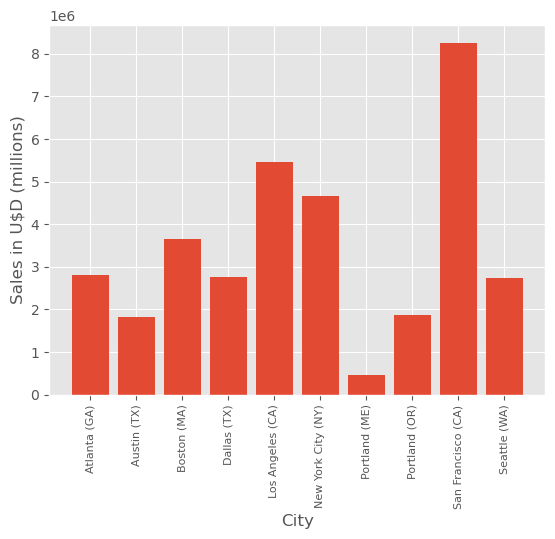

In [366]:
# Now, we look to sum every order total grouped by city

city_results = df.groupby('City').sum('Order Total')['Order Total']

# And we create a city list for our x-axis with list comprehension

cities = [city for city, df in df.groupby('City')]

# Finally, we call matplotlib for a bar chart

plt.bar(cities, city_results)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in U$D (millions)')
plt.xlabel('City')

plt.show()

In [ ]:
# Question 3: What time should we display ads to maximize likelihood of customer's buying product?

In [367]:
# First of all, we would like to re-format our Order Date column, to a DateTime format, specifying the desired result

df['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

# Now, we create new columns with the information needed thanks to dt.hour and dt.minute

df['Order Hour'] = df['Order Date'].dt.hour
df['Order Minute'] = df['Order Date'].dt.minute

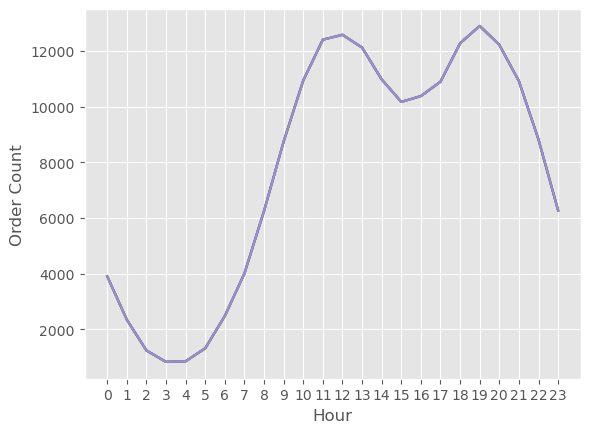

In [370]:
# In order to create a new plot diagram, we first need a list with all the possible hours
# We could've simply created a range from 0 to 23 (which is all the hours there is in a day)
# But some business have sales only registered during certain hours, so we wouldn't want to display hours with no orders

# So we do list comprehension to get all order hours in the dataframe
hours = [hour for hour, df in df.groupby('Order Hour')]

plt.plot(hours, df.groupby(['Order Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.show()

In [228]:
# Question 4: What products are most often sold together?

In [373]:
# Luckily, when products are sold together in a cart, the Order ID remains the same, so we can use it to our advantage
# We create a temporary dataframe that only shows columns with repeated Order ID from the original dataframe

new_df = df[df['Order ID'].duplicated(keep=False)]

# Now we create a new column, which will show what group of products were ordered
# And afterwards, we drop its duplicates for we no longer need to have more than one instance of each Order ID

new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_2516\2009359544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [375]:
# Lastly we set up a counter and with most_common function, we get a list of the top 10 group orders

count = Counter()

for row in new_df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [273]:
# Question 5: What product sold the most? Why do you think it did?

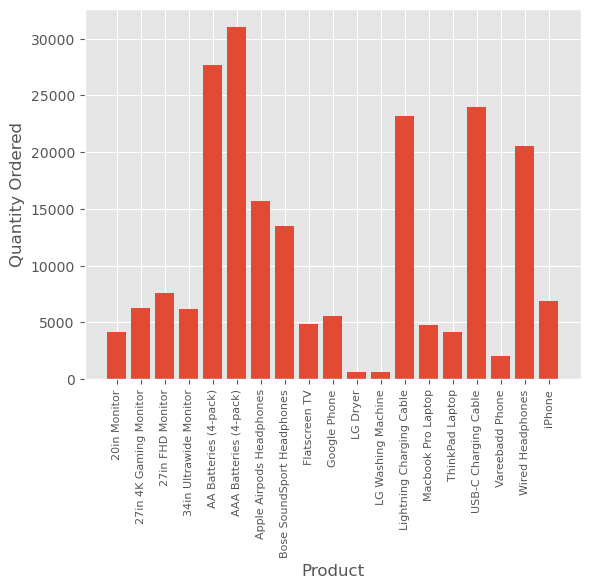

In [383]:
# As we did previously with hour, city and month, we create a list with our total quantity ordered grouped by product
# Also, a list of each product in our df for our x-axis
# After that, we call for a plt bar chart

product_results = df.groupby(['Product']).sum('Quantity Ordered')['Quantity Ordered']

products = [product for product, df in df.groupby('Product')]

plt.bar(products, product_results)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

# So now we can easily see our top sold items in qty, these being batteries and charging cables
# And to answer Why, my initial instinct would be them being the least expensive options in our catalog

In [382]:
# To follow on that last thought, let's take a look at a simple list with each product and their price

prices = df.groupby('Product').mean('Price Each')['Price Each']
print(prices)

# As suspected, those were our least expensive products

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


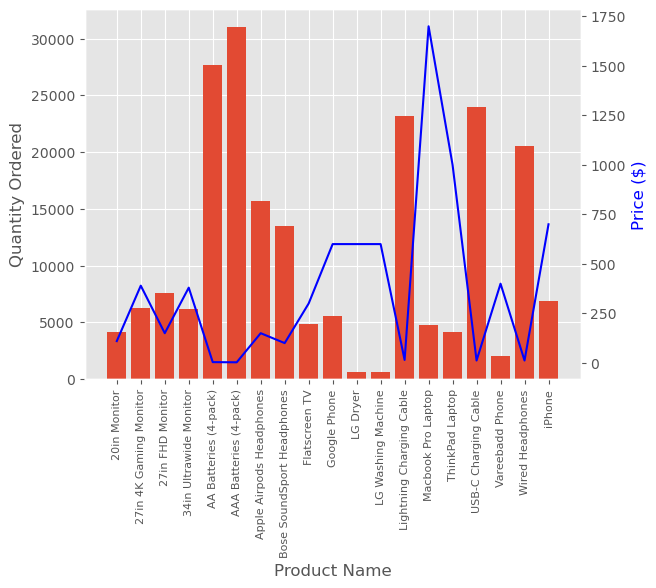

In [347]:
# In order to visualize this in a graph, we can add a secondary y-axis
# The best way would be to interact with the axes object directly

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_results)
ax2.plot(products, prices, 'b-')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xlabel('Product Name')
ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation='vertical', size=8)

ax2.grid()
plt.show()

# And there it is, now we can clearly see the contrast within each product's price and their total quantity ordered
# As a final conclusion to this final question
# We notice that there is a correlation with each product's price and their amount sold
# Less expensive products can be more accessible and are targeting a broader audience than the most expensive ones